In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, zscore, ttest_ind, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Problem Introduction:

The problem at hand revolves around predicting the onset of diabetes in individuals based on various health-related features. Diabetes is a prevalent health condition with significant implications for individuals and healthcare systems. Early detection and accurate prediction can contribute to timely intervention and improved patient outcomes.

Our goal is to develop predictive models using machine learning algorithms that can analyze patterns within a given dataset to effectively predict the likelihood of an individual developing diabetes. We'll explore several models, including Naive Bayesian, Bayesian Belief Network, Decision Tree (Entropy), and K-Nearest Neighbors (K-NN) with different distance metrics.

## Data Sets Description:

The dataset used for this project contains information about individuals, including features such as pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function, age, and an outcome variable indicating whether the individual has diabetes (1) or not (0).

Attributes:

Pregnancies: Number of times pregnant.
Glucose: Plasma glucose concentration.
Blood Pressure: Diastolic blood pressure.
Skin Thickness: Triceps skin fold thickness.
Insulin: 2-Hour serum insulin.
BMI (Body Mass Index): Weight in kg/(height in m)^2.
Diabetes Pedigree Function: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).
Age: Age in years.
Outcome: Target variable indicating the presence (1) or absence (0) of diabetes.

In [26]:
df = pd.read_csv("diabetes.csv")

In [27]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


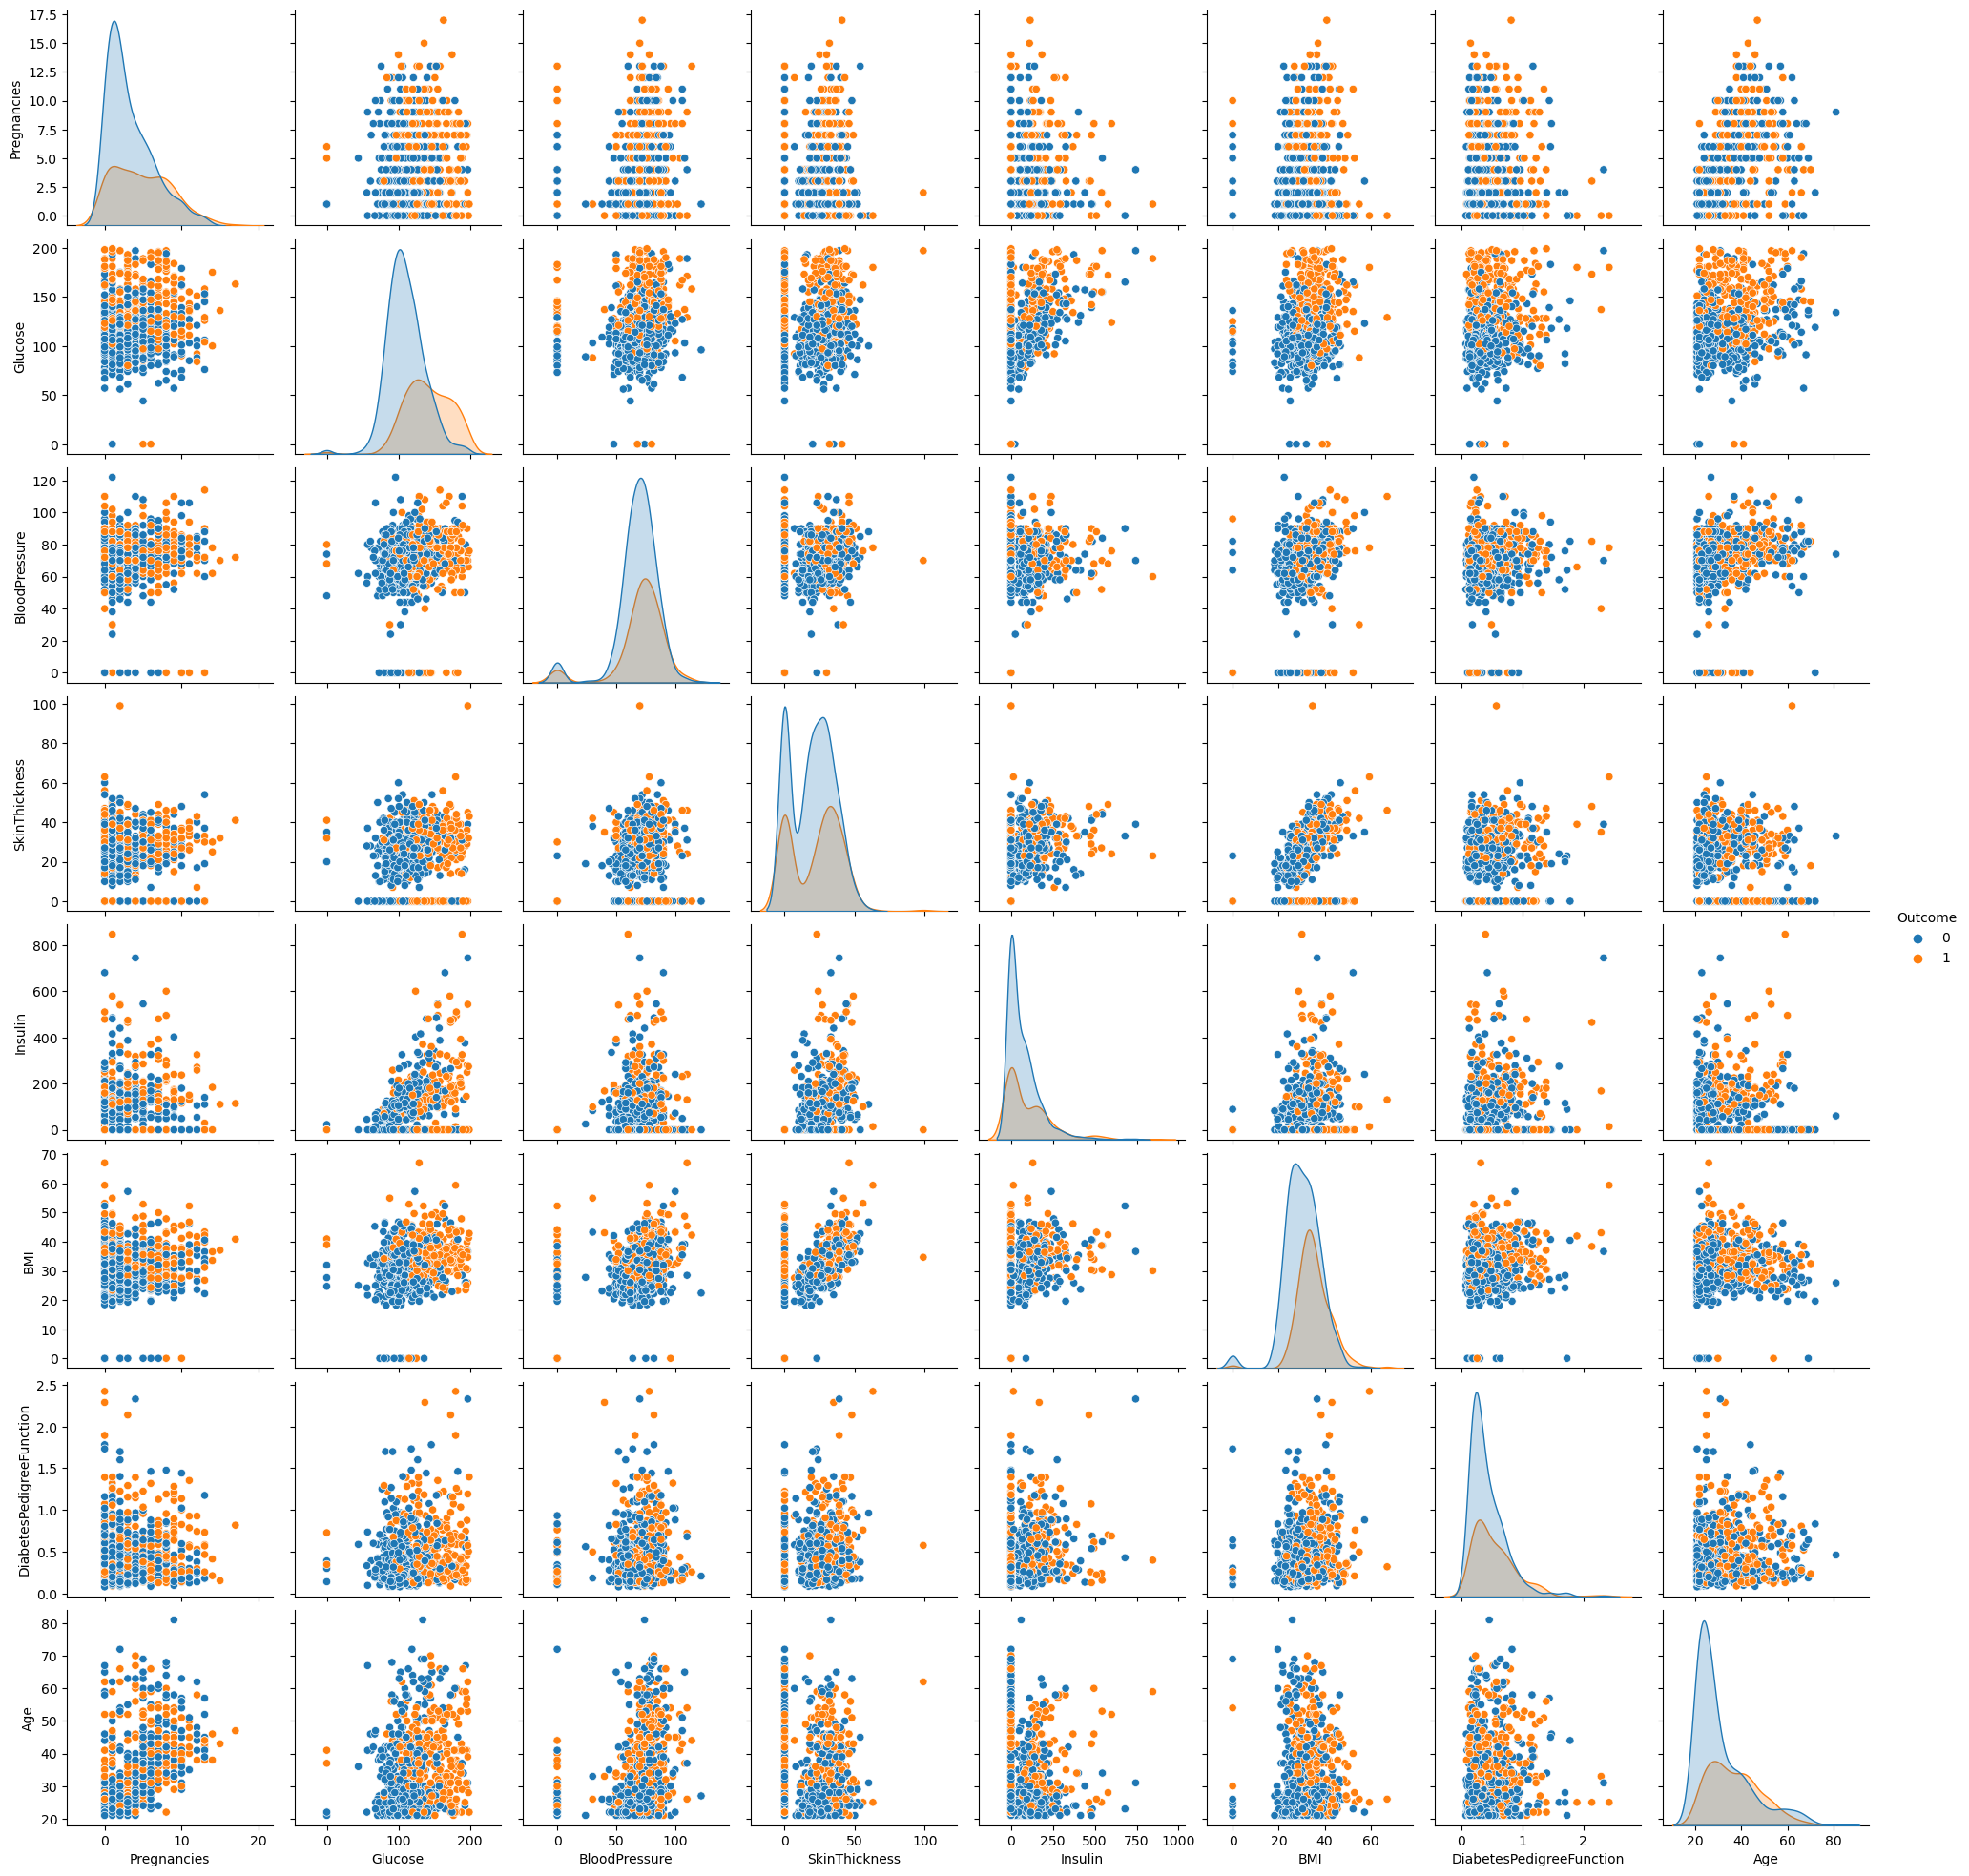

In [28]:
# Data Visualization
sns.pairplot(df, hue='Outcome')
plt.show()


In [29]:

# Missing Values Treatment
# Replace 0 values in columns where 0 is not a valid value
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Impute missing values using mean
df.fillna(df.mean(), inplace=True)


In [31]:

# Binning process (If exist)
# Example: Binning the 'Age' column into categories
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
#argument means that the intervals are left-closed and right-open.which is common convention


In [32]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.400000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [33]:
# Data Analysis (Min, Max, Mean, Variance, Standard Deviation, Skewness, Kurtosis)
summary_stats = df.describe().transpose()
skewness = df.skew()
kurtosis = df.kurt()

# Data Analysis (Covariance matrix, Correlation, Heat map)
cov_matrix = df.cov()
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

TypeError: 'Categorical' with dtype category does not support reduction 'skew'

In [24]:
print(summary_stats)
print(f'Skweness : {skewness}' )
print(f'Kurtosiss{kurtosis}')

                          count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.686763  30.435949  44.000   99.75000   
BloodPressure             768.0   72.405184  12.096346  24.000   64.00000   
SkinThickness             768.0   29.153420   8.790942   7.000   25.00000   
Insulin                   768.0  155.548223  85.021108  14.000  121.50000   
BMI                       768.0   32.457464   6.875151  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                                 50%         75%     max  
Pregnancies                 3.000000    6.000000   17.00  
Glucose                   117.000000  140.250000  199.00  
BloodPressure              72.202592   80.000000  12

NameError: name 'skewness' is not defined

In [12]:

# Chi-square Test (Example: Chi-square test for independence between 'Age_Category' and 'Outcome')
contingency_table = pd.crosstab(df['Age_Category'], df['Outcome'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}\np-value: {p}")


Chi-square statistic: 79.06859593379563
p-value: 1.3142217750636462e-15


In [109]:

# Z-test or t-test (Example: Z-test for 'Glucose' between diabetic and non-diabetic individuals)
z_stat, p_value = zscore(df[df['Outcome'] == 1]['Glucose']), zscore(df[df['Outcome'] == 0]['Glucose'])
t_stat, t_p_value = ttest_ind(df[df['Outcome'] == 1]['Glucose'], df[df['Outcome'] == 0]['Glucose'])

# ANOVA (Example: One-way ANOVA for 'Age' across different 'Outcome' groups)
f_stat, f_p_value = f_oneway(df[df['Outcome'] == 0]['Age'], df[df['Outcome'] == 1]['Age'])

# Print results
print("\nZ-test for 'Glucose' between diabetic and non-diabetic individuals:")
print(f"Z-statistic: {z_stat}\np-value: {p_value}\n")
print("\nOne-way ANOVA for 'Age' across different 'Outcome' groups:")
print(f"F-statistic: {f_stat}\np-value: {f_p_value}")



Z-test for 'Glucose' between diabetic and non-diabetic individuals:
Z-statistic: 0      0.197867
2      1.384848
4     -0.175184
6     -2.176094
8      1.859640
         ...   
755   -0.480407
757   -0.649976
759    1.622244
761    0.943969
766   -0.548235
Name: Glucose, Length: 268, dtype: float64
p-value: 1     -1.041219
3     -0.879225
5      0.214232
7      0.173733
10    -0.028759
         ...   
762   -0.879225
763   -0.393244
764    0.457222
765    0.416724
767   -0.717232
Name: Glucose, Length: 500, dtype: float64


One-way ANOVA for 'Age' across different 'Outcome' groups:
F-statistic: 46.14061123873557
p-value: 2.2099754606650332e-11


# LDA as feature reduction

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Assume 'df' is your dataset, and 'Outcome' is the target variable
X = df.drop(['Outcome', 'Age_Category'], axis=1)  # Remove unnecessary columns
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a classifier on the reduced features (LDA)
clf_lda = LogisticRegression()
clf_lda.fit(X_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)

# Evaluate accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f'Accuracy with LDA: {accuracy_lda:.2f}')


Accuracy with LDA: 0.77


# LDA as classification model

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Assume 'df' is your dataset, and 'Outcome' is the target variable
X = df.drop(['Outcome', 'Age_Category'], axis=1)  # Remove unnecessary columns
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an LDA model
lda_model = LinearDiscriminantAnalysis()

# Train the model
lda_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lda = lda_model.predict(X_test)

# Evaluate the model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
confusion_lda = confusion_matrix(y_test, y_pred_lda)
classification_rep_lda = classification_report(y_test, y_pred_lda)

# Print results for LDA
print("\nLinear Discriminant Analysis (LDA):")
print(f"Accuracy on Test Set: {accuracy_lda:.2f}")
print("Confusion Matrix:")
print(confusion_lda)
print("Classification Report:")
print(classification_rep_lda)



Linear Discriminant Analysis (LDA):
Accuracy on Test Set: 0.77
Confusion Matrix:
[[84 15]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



# PCA

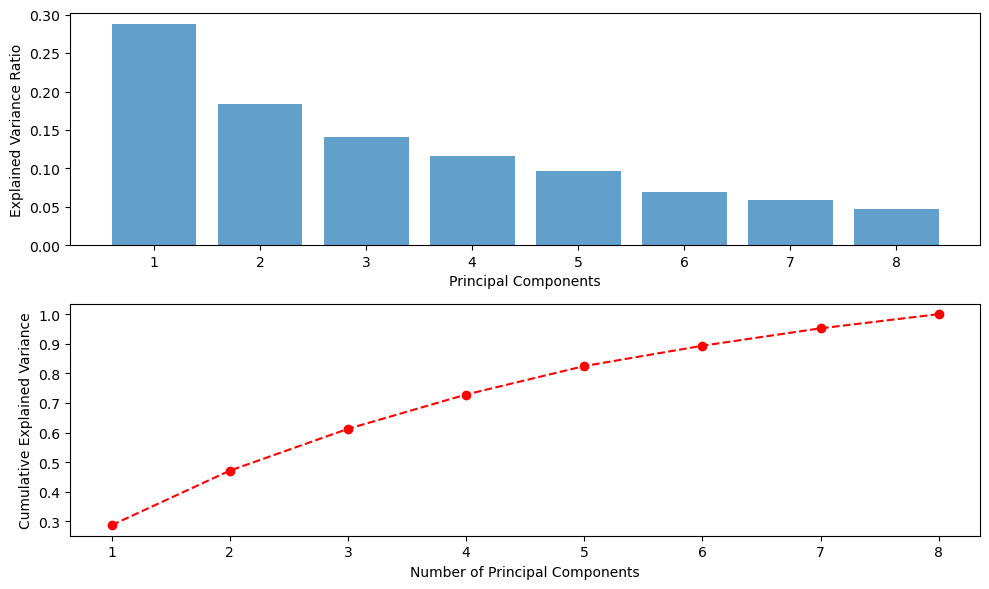

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assume 'df' is your dataset
X = df.drop(['Outcome', 'Age_Category'], axis=1)  # Remove unnecessary columns
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))

# Plot explained variance ratio
plt.subplot(2, 1, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')

# Plot cumulative explained variance
plt.subplot(2, 1, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='r')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')

plt.tight_layout()
plt.show()


# SVD 

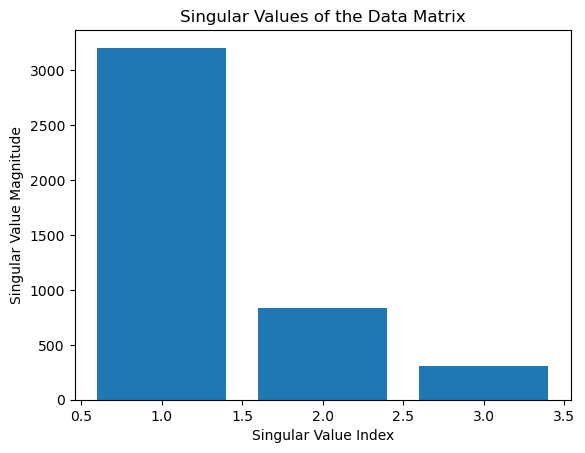

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Select relevant columns
selected_columns = ["Age", "Insulin", "Glucose"]
X = df[selected_columns].values

# Center the data (subtract mean)
X_centered = X - np.mean(X, axis=0)

# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(X_centered)

# Plot the singular values
plt.bar(range(1, min(X.shape)+1), S)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value Magnitude')
plt.title('Singular Values of the Data Matrix')
plt.show()


# Naive Bayesian

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assume 'df' is your dataset, and 'Outcome' is the target variable
X = df.drop(['Outcome', 'Age_Category'], axis=1)  # Remove unnecessary columns
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Naive Bayesian model
nb_model = GaussianNB()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_nb_cv = cross_val_score(nb_model, X_scaled, y, cv=kf, scoring='accuracy').mean()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
confusion_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Print results
print("\nNaive Bayesian:")
print(f"Average Accuracy (K-Fold CV): {accuracy_nb_cv:.2f}")
print(f"Accuracy on Test Set: {accuracy_nb:.2f}")
print("Confusion Matrix:")
print(confusion_nb)
print("Classification Report:")
print(classification_rep_nb)



Naive Bayesian:
Average Accuracy (K-Fold CV): 0.75
Accuracy on Test Set: 0.75
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Decision Tree model with entropy as the criterion
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_dt_cv = cross_val_score(dt_model, X_scaled, y, cv=kf, scoring='accuracy').mean()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print results for Decision Tree (Entropy)
print("\nDecision Tree (Entropy):")
print(f"Average Accuracy (K-Fold CV): {accuracy_dt_cv:.2f}")
print(f"Accuracy on Test Set: {accuracy_dt:.2f}")
print("Confusion Matrix:")
print(confusion_dt)
print("Classification Report:")
print(classification_rep_dt)



Decision Tree (Entropy):
Average Accuracy (K-Fold CV): 0.73
Accuracy on Test Set: 0.74
Confusion Matrix:
[[76 23]
 [17 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create K-NN models with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_minkowski = KNeighborsClassifier(n_neighbors=5, metric='minkowski')  # Minkowski with p=2 is equivalent to Euclidean

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_knn_euclidean_cv = cross_val_score(knn_euclidean, X_scaled, y, cv=kf, scoring='accuracy').mean()
accuracy_knn_manhattan_cv = cross_val_score(knn_manhattan, X_scaled, y, cv=kf, scoring='accuracy').mean()
accuracy_knn_minkowski_cv = cross_val_score(knn_minkowski, X_scaled, y, cv=kf, scoring='accuracy').mean()

# Train the models
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_minkowski.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_knn_euclidean = knn_euclidean.predict(X_test)
y_pred_knn_manhattan = knn_manhattan.predict(X_test)
y_pred_knn_minkowski = knn_minkowski.predict(X_test)

# Evaluate the models
accuracy_knn_euclidean = accuracy_score(y_test, y_pred_knn_euclidean)
accuracy_knn_manhattan = accuracy_score(y_test, y_pred_knn_manhattan)
accuracy_knn_minkowski = accuracy_score(y_test, y_pred_knn_minkowski)

# Print results for K-NN (Different distances)
print("\nK-NN (Euclidean):")
print(f"Average Accuracy (K-Fold CV): {accuracy_knn_euclidean_cv:.2f}")
print(f"Accuracy on Test Set: {accuracy_knn_euclidean:.2f}")
# ... Repeat for K-NN (Manhattan) and K-NN (Minkowski)



K-NN (Euclidean):
Average Accuracy (K-Fold CV): 0.74
Accuracy on Test Set: 0.74


# ROC 

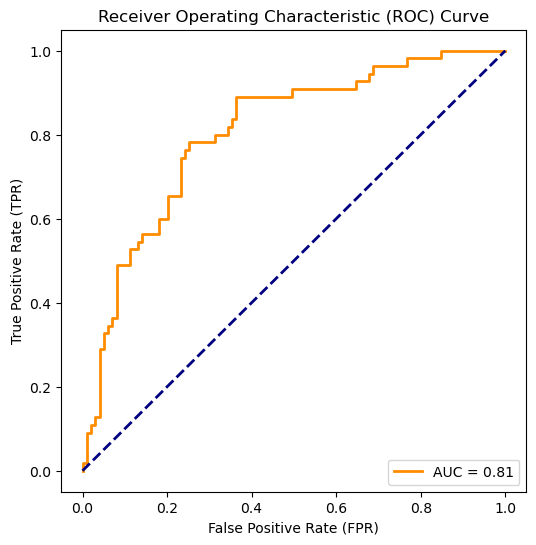

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load the dataset (replace 'path/to/diabetes.csv' with your file path)
df = pd.read_csv('diabetes.csv')

# Select relevant columns
selected_columns = ["Age", "Insulin", "Glucose"]
X = df[selected_columns].values
y = df["Outcome"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a neural network classifier
model = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Neural Network 

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Select relevant columns
selected_columns = ["Age", "Insulin", "Glucose"]
X = df[selected_columns].values
y = df["Outcome"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a neural network classifier
model = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy on the test set: 0.74

Confusion Matrix:
[[83 16]
 [24 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.66      0.56      0.61        55

    accuracy                           0.74       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



# Bayesian Belief Network

In [138]:

from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume 'df' is your dataset, and 'Outcome' is the target variable
X = df.drop(['Outcome', 'Age_Category'], axis=1)  # Remove unnecessary columns
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Bayesian Network structure based on domain knowledge
# Replace the placeholder variables and adjust the structure accordingly
bbn_model_structure = [
    ('Pregnancies', 'Outcome'),
    ('Glucose', 'Outcome'),
    ('BloodPressure', 'Outcome'),
    ('SkinThickness', 'Outcome'),
    ('Insulin', 'Outcome'),
    ('BMI', 'Outcome'),
    ('DiabetesPedigreeFunction', 'Outcome'),
    ('Age', 'Outcome'),
]

# Create the Bayesian Belief Network
bbn_model = BayesianModel(bbn_model_structure)

# Learn CPDs using Maximum Likelihood Estimators
bbn_model.fit(X_train, estimator=MaximumLikelihoodEstimator)

# Inference on the test set
y_pred_bbn = bbn_model.predict(X_test)

# Evaluate the model
accuracy_bbn = accuracy_score(y_test, y_pred_bbn['Outcome'])

# Print the accuracy
print(f'Accuracy of Bayesian Belief Network: {accuracy_bbn:.2f}')


KeyError: "['Age_Category'] not found in axis"

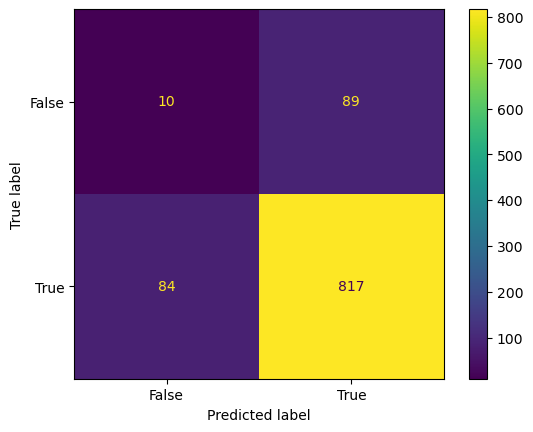

In [73]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Comparison Table

In [74]:
import pandas as pd

# Create a DataFrame to store the results
results_data = {
    'Model': ['Naive Bayesian', 'Bayesian Belief Network', 'Decision Tree (Entropy)', 'K-NN (Euclidean)', 'K-NN (Manhattan)', 'K-NN (Minkowski)'],
    'Average Accuracy (K-Fold CV)': [accuracy_nb_cv, None, accuracy_dt_cv, accuracy_knn_euclidean_cv, accuracy_knn_manhattan_cv, accuracy_knn_minkowski_cv],
    'Accuracy on Test Set': [accuracy_nb, None, accuracy_dt, accuracy_knn_euclidean, accuracy_knn_manhattan, accuracy_knn_minkowski],
}

results_df = pd.DataFrame(results_data)

# Print the DataFrame
print(results_df)


                     Model  Average Accuracy (K-Fold CV)  Accuracy on Test Set
0           Naive Bayesian                      0.750030              0.746753
1  Bayesian Belief Network                           NaN                   NaN
2  Decision Tree (Entropy)                      0.725278              0.740260
3         K-NN (Euclidean)                      0.740905              0.740260
4         K-NN (Manhattan)                      0.735693              0.740260
5         K-NN (Minkowski)                      0.740905              0.740260


# References 

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

American Diabetes Association. (2010, January). Diagnosis and classification of diabetes mellitus. Diabetes care. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2797383/ 

In [71]:
!pip install pgmpy

  Obtaining dependency information for pgmpy from https://files.pythonhosted.org/packages/eb/9a/2fcb6fdfd998a016cef29ca3eab30b98b6c232b6e9a0444df07f0ad47f8d/pgmpy-0.1.24-py3-none-any.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e4/ae/2ad8820045b6631965750435f28583e80905b8273d57cf026163b51323ee/torch-2.1.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.5 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.5 kB ? eta -:--:--
     ----------------------- -------------- 41.0/65.5 kB 487.6 kB/s eta 0:00:01
     ----------------------------------- -- 61.4/65.5 kB 328.2 kB/s eta 0:00:01
     -------------------------------------- 65.5/65.5 kB 321.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 1.9 MB/s eta 0:00:

In [1]:
!pip install numpy


In [127]:
!pip install keras


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/ca/48/643d21747d52fa380f572f76c493779fc5b4bd03605247209d2dd0a6d9a9/keras-3.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/101.3 kB ? eta -:--:--
     --------------------------- ----------- 71.7/101.3 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 101.3/101.3 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.0 MB 2.0 MB/s eta 0:00:01
   ---- --------------------------

In [130]:
!pip install scikit-learn matplotlib